In [124]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns





In [125]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [126]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [127]:
df.shape

(1025, 14)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [129]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

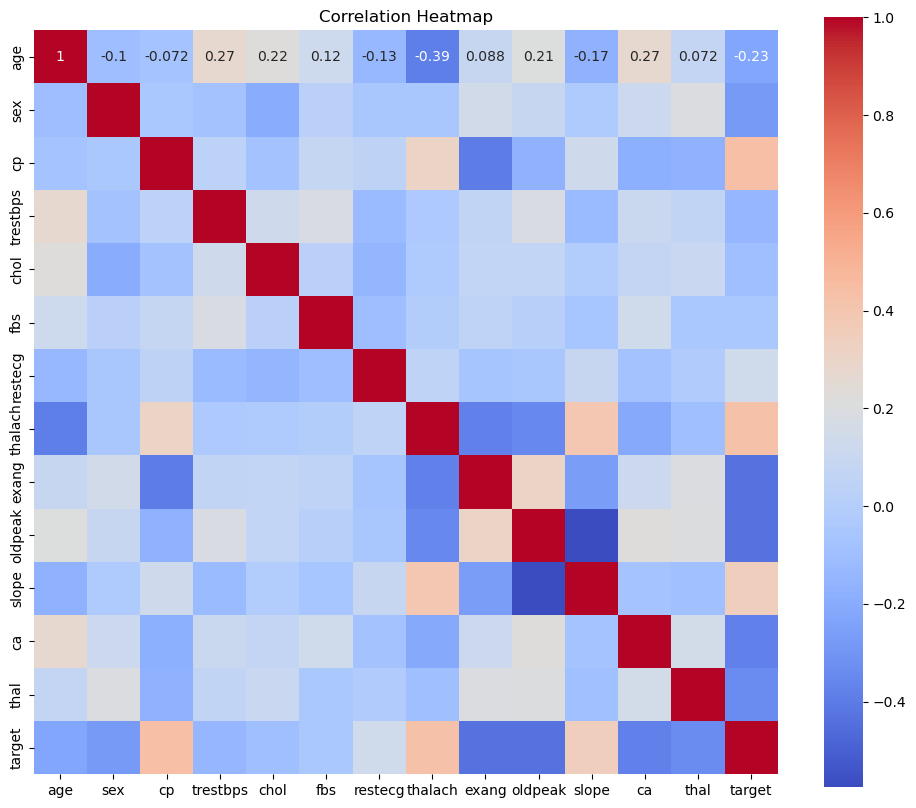

In [130]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [131]:
df.columns.duplicated().sum()

0

In [132]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

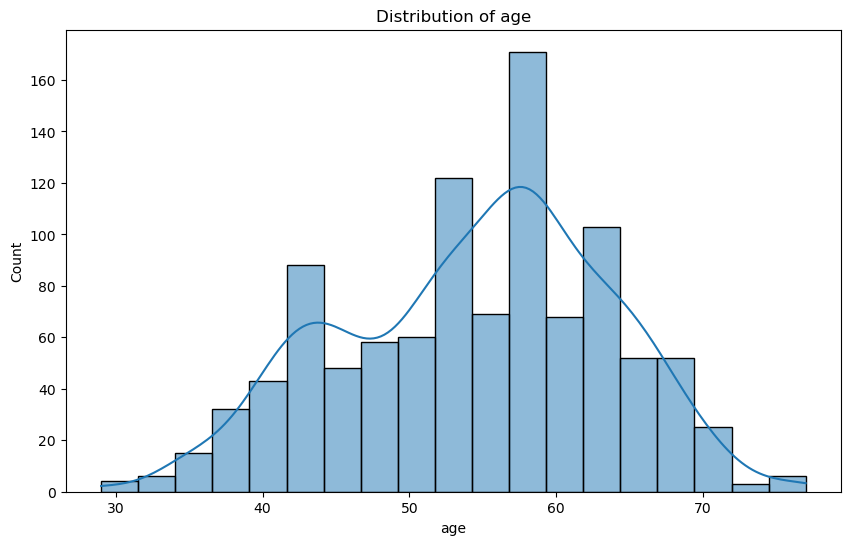

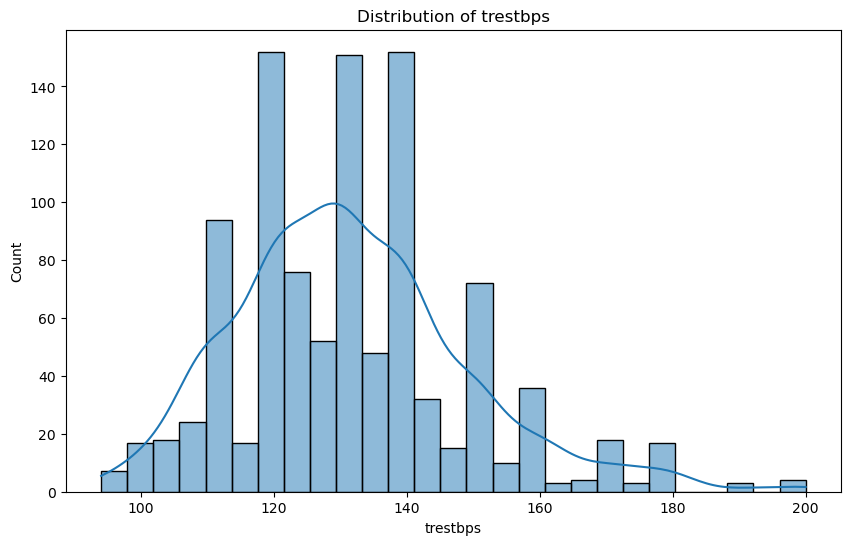

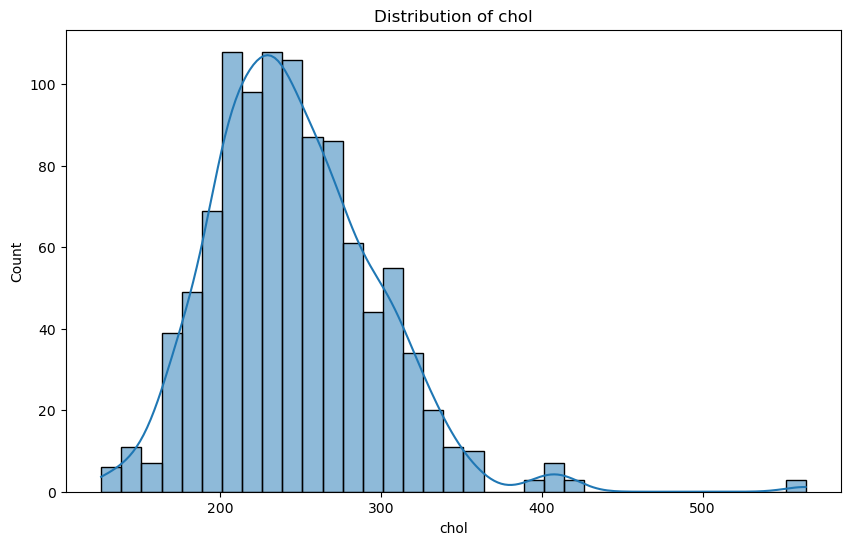

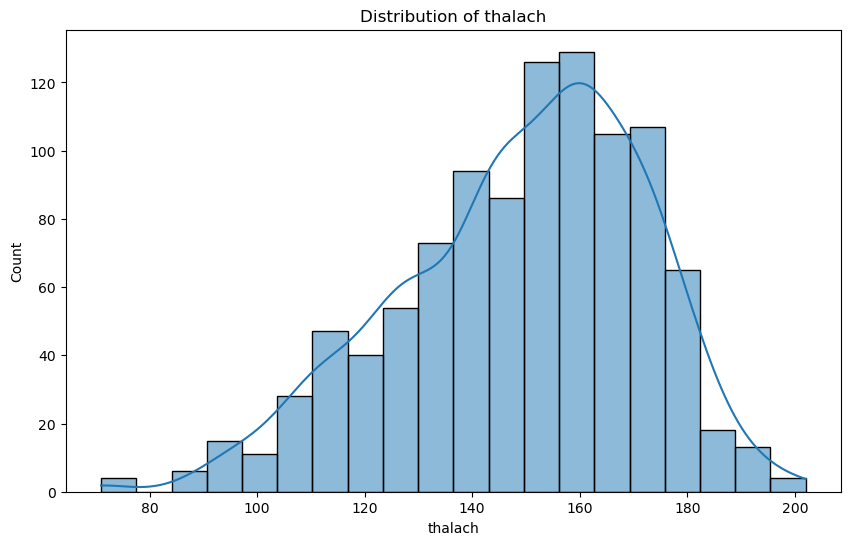

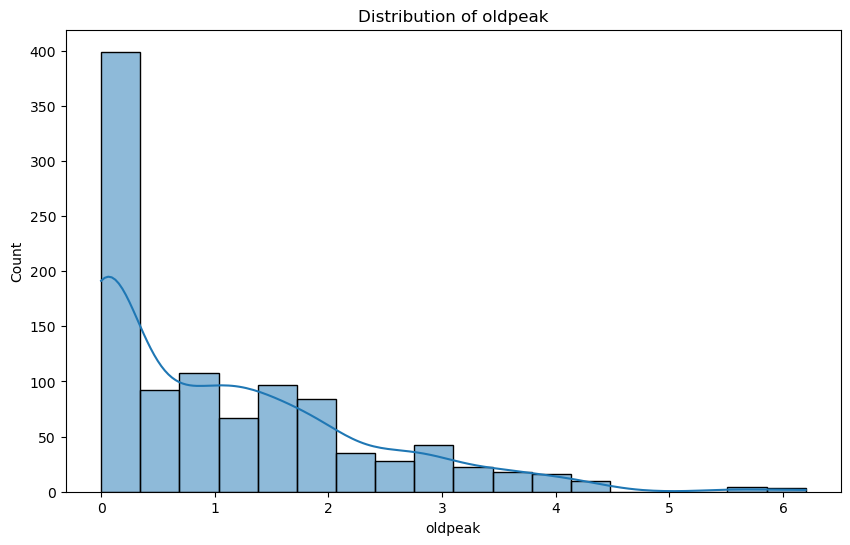

In [133]:
# Plot histograms for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [134]:
# # Plot bar charts for categorical features
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 
#                         'exang', 'slope', 'ca','thal']
# for feature in categorical_features:
#     plt.figure(figsize=(10,6))
#     sns.countplot(x=feature , data=df)
#     plt.title(f'Distribution of {feature} by target')
#     plt.show()


In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


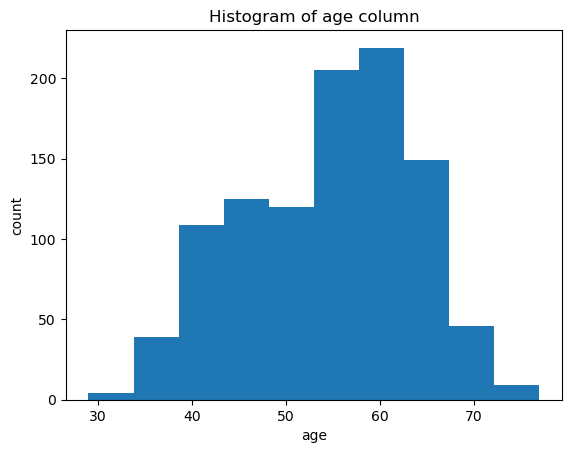

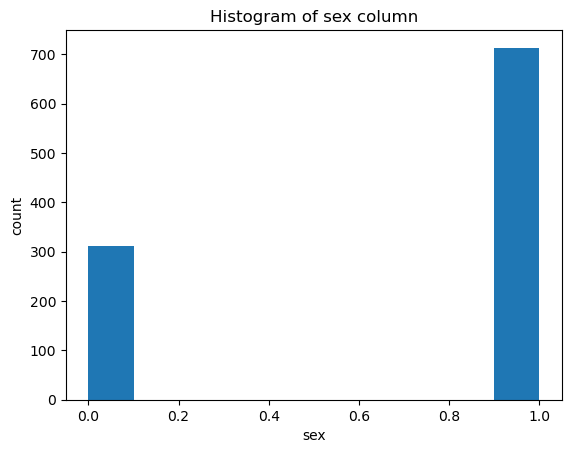

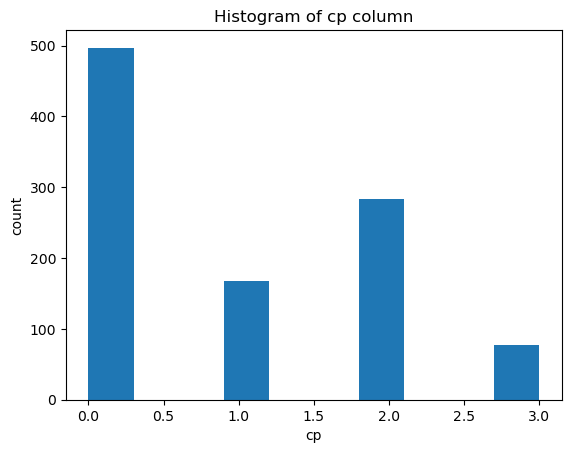

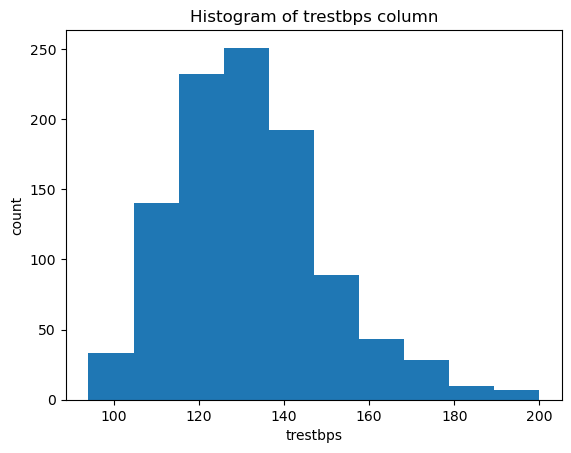

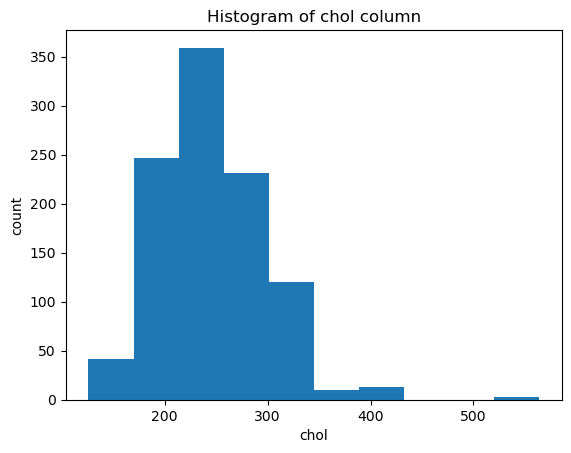

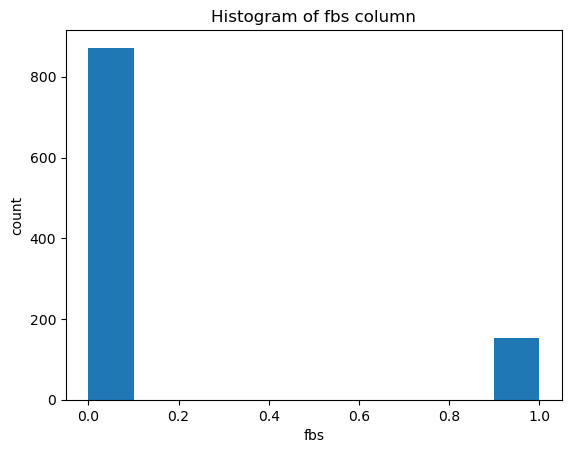

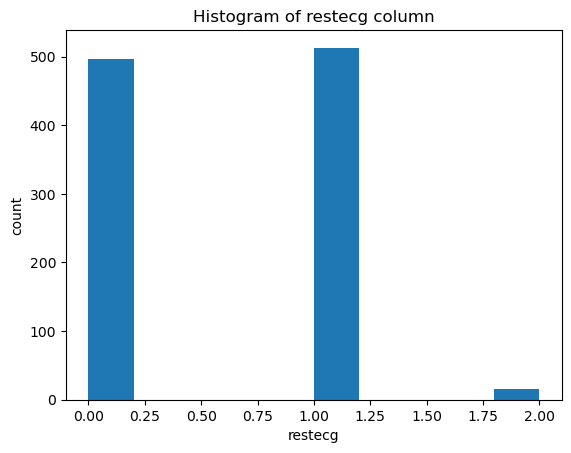

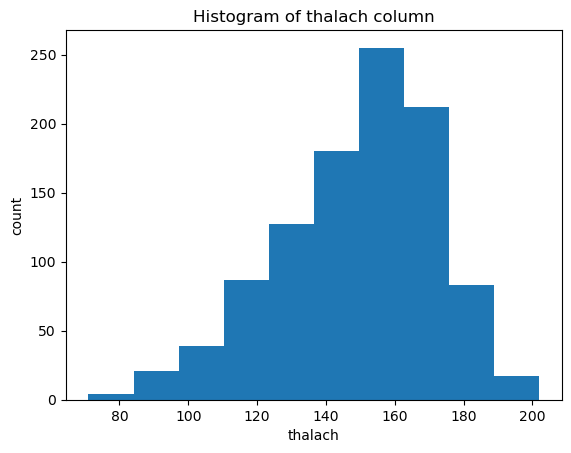

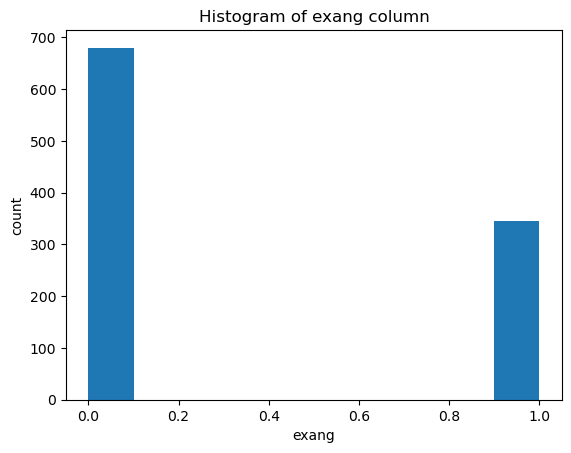

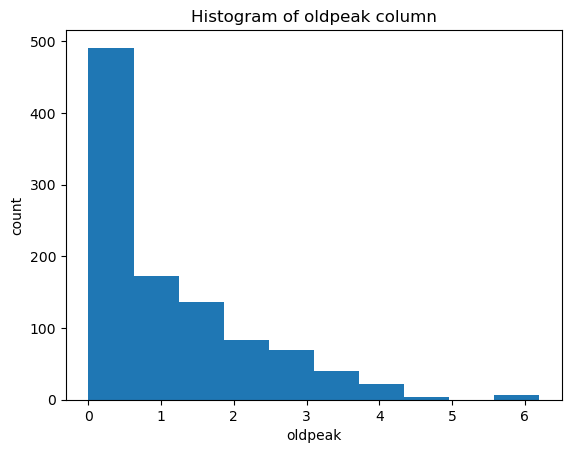

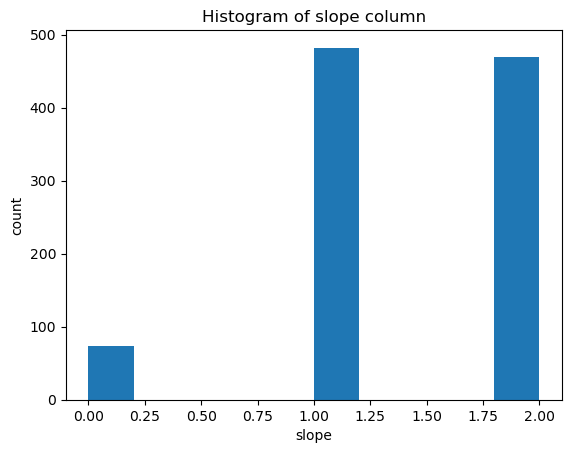

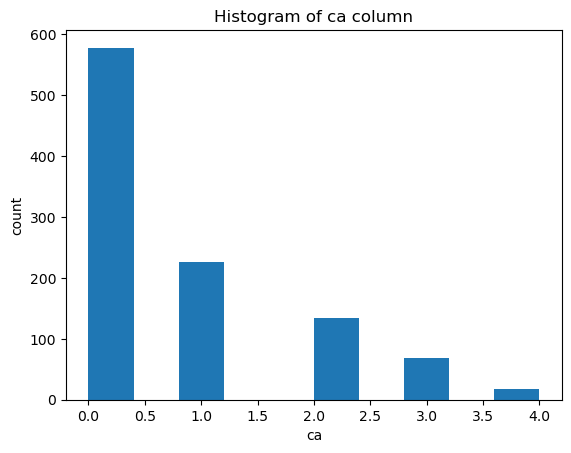

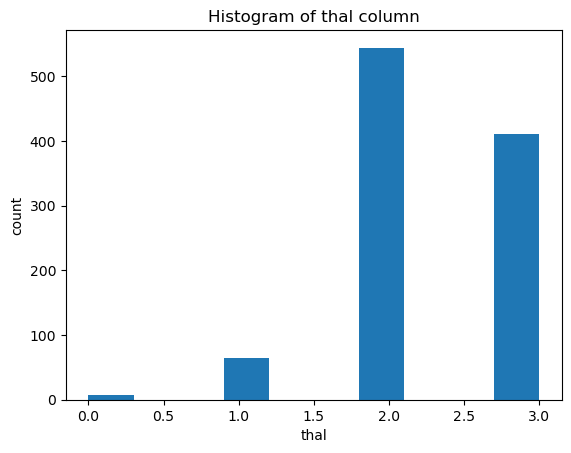

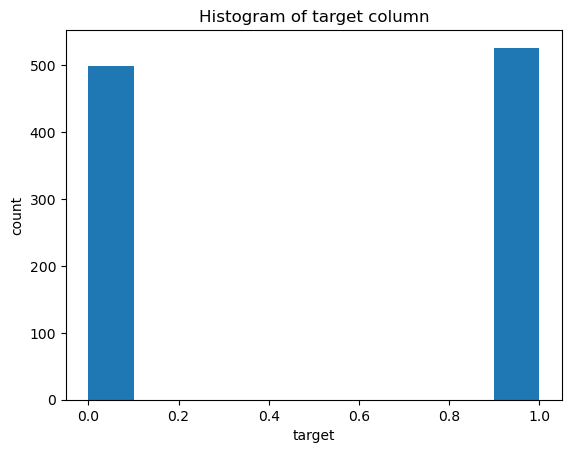

In [136]:
for col in df:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [137]:
# # Create pair plots
# sns.pairplot(df, hue='target', markers=['o', 's'])
# plt.show()


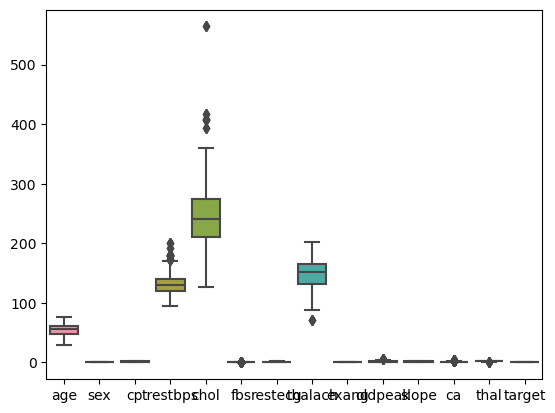

In [138]:
sns.boxplot(df)
plt.show()

In [139]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [140]:
for col in df:
  df[col] = remove_outliers(df, col)

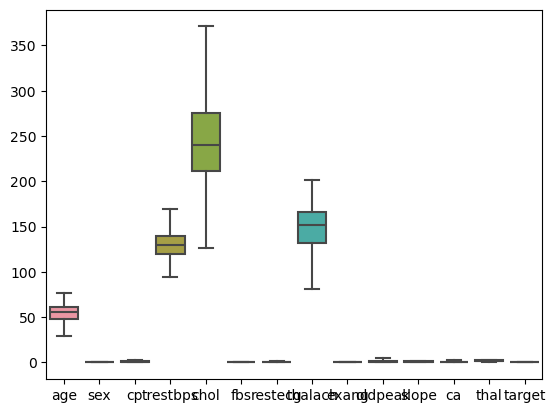

In [141]:
sns.boxplot(df)
plt.show()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 112.2+ KB


In [143]:
#chest pain type, resting electrocardiographic results, thal

In [144]:
multi_enc = pd.get_dummies(df,columns=['cp','restecg','thal'],dtype='int',drop_first=True)
multi_enc

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,125.0,212.0,0,168.0,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140.0,203.0,0.0,155.0,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145.0,174.0,0,125.0,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148.0,203.0,0,161.0,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138.0,294.0,0.0,106.0,0,1.9,1,2.5,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140.0,221.0,0,164.0,1,0.0,2,0,1,1,0,0,1,0,0,1,0
1021,60,1,125.0,258.0,0,141.0,1,2.8,1,1,0,0,0,0,0,0,0,0,1
1022,47,1,110.0,275.0,0,118.0,1,1.0,1,1,0,0,0,0,0,0,0,1,0
1023,50,0,110.0,254.0,0,159.0,0,0.0,2,0,1,0,0,0,0,0,0,1,0


In [145]:
bin_cat = df[['sex','fbs']]
bin_cat = bin_cat.astype("category")

In [146]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
encoded_data = be.fit_transform(bin_cat)
encoded_data 

,sex_0,sex_1,fbs_0
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,1,0,1
...,...,...,...
1020,0,1,1
1021,0,1,1
1022,0,1,1
1023,1,0,1


In [147]:
##resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler

In [148]:
scale_col = df[['age','trestbps','chol','thalach','oldpeak']]

In [149]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(scale_col)
sc_df = pd.DataFrame(scaled_data,columns = scale_col.columns)
sc_df

,age,trestbps,chol,thalach,oldpeak
0,-0.268437,-0.378869,-0.691104,0.824084,-0.054537
1,-0.158157,0.528894,-0.879693,0.255654,1.785457
2,1.716595,0.831481,-1.487368,-1.056105,1.347363
3,0.724079,1.013034,-0.879693,0.518006,-0.930725
4,0.834359,0.407859,1.027150,-1.886886,0.734031
...,...,...,...,...,...
1020,0.503520,0.528894,-0.502515,0.649182,-0.930725
1021,0.613800,-0.378869,0.272795,-0.356500,1.522600
1022,-0.819834,-1.286632,0.629018,-1.362182,-0.054537
1023,-0.488996,-1.286632,0.188977,0.430556,-0.930725


In [150]:
df[['age','trestbps','chol','thalach','oldpeak']] = sc_df[['age','trestbps','chol','thalach','oldpeak']]


In [151]:
df.drop(['cp','restecg','thal'],axis=1)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target
0,-0.268437,1,-0.378869,-0.691104,0,0.824084,0,-0.054537,2,2,0
1,-0.158157,1,0.528894,-0.879693,0.0,0.255654,1,1.785457,0,0,0
2,1.716595,1,0.831481,-1.487368,0,-1.056105,1,1.347363,0,0,0
3,0.724079,1,1.013034,-0.879693,0,0.518006,0,-0.930725,2,1,0
4,0.834359,0,0.407859,1.027150,0.0,-1.886886,0,0.734031,1,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.528894,-0.502515,0,0.649182,1,-0.930725,2,0,1
1021,0.613800,1,-0.378869,0.272795,0,-0.356500,1,1.522600,1,1,0
1022,-0.819834,1,-1.286632,0.629018,0,-1.362182,1,-0.054537,1,1,0
1023,-0.488996,0,-1.286632,0.188977,0,0.430556,0,-0.930725,2,0,1


In [152]:
df[['cp_1','cp_2','cp_3','restecg_1','restecg_2','thal_1.0','thal_2.0','thal_3.0']] = multi_enc[['cp_1','cp_2','cp_3','restecg_1','restecg_2','thal_1.0','thal_2.0','thal_3.0']]

In [153]:
df= df.drop("cp",axis=1)

In [154]:
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,thal,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,-0.268437,1,-0.378869,-0.691104,0,1,0.824084,0,-0.054537,2,...,3,0,0,0,0,1,0,0,0,1
1,-0.158157,1,0.528894,-0.879693,0.0,0,0.255654,1,1.785457,0,...,3,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.831481,-1.487368,0,1,-1.056105,1,1.347363,0,...,3,0,0,0,0,1,0,0,0,1
3,0.724079,1,1.013034,-0.879693,0,1,0.518006,0,-0.930725,2,...,3,0,0,0,0,1,0,0,0,1
4,0.834359,0,0.407859,1.027150,0.0,1,-1.886886,0,0.734031,1,...,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.528894,-0.502515,0,1,0.649182,1,-0.930725,2,...,2,1,1,0,0,1,0,0,1,0
1021,0.613800,1,-0.378869,0.272795,0,0,-0.356500,1,1.522600,1,...,3,0,0,0,0,0,0,0,0,1
1022,-0.819834,1,-1.286632,0.629018,0,0,-1.362182,1,-0.054537,1,...,2,0,0,0,0,0,0,0,1,0
1023,-0.488996,0,-1.286632,0.188977,0,0,0.430556,0,-0.930725,2,...,2,1,0,0,0,0,0,0,1,0


In [174]:
X= df[['age', 'sex', 'fbs', 'restecg', 'thalach', 'exang', 'thal', 'target',
       'cp_1', 'cp_3', 'restecg_1', 'restecg_2', 'thal_1.0', 'thal_2.0',
       'thal_3.0']]
y= df['chol']

In [175]:
y

0      -0.691104
1      -0.879693
2      -1.487368
3      -0.879693
4       1.027150
          ...   
1020   -0.502515
1021    0.272795
1022    0.629018
1023    0.188977
1024   -1.194008
Name: chol, Length: 1025, dtype: float64

In [178]:
 from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Feature Elimination Using RFE

In [179]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume X is your feature matrix and y is your target variable
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10)
selector.fit(X, y)

# Get the selected features
support = selector.support_
feature_names = X.columns[support]

# Get the ranking of features
ranking = selector.ranking_

print("Selected features:", feature_names)
print("Feature rankings:", ranking)


Selected features: Index(['age', 'sex', 'exang', 'thal', 'target', 'cp_1', 'cp_3', 'restecg_1',
       'thal_1.0', 'thal_2.0'],
      dtype='object')
Feature rankings: [1 1 6 5 2 1 1 1 1 1 1 3 1 1 4]


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [181]:
y_pred = model.predict(X_test)


In [182]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.7921174210364537
R^2 Score: 0.17309991080395415


# classification 

In [186]:
X1 = df.drop(['target'],axis=1)

In [187]:
y1 = df['target']

In [191]:
y1 = y1.astype('category')


In [192]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=2)

In [193]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


model = LogisticRegression()
model.fit(X1_train, y1_train)

LogisticRegression()

In [194]:
# Make predictions on the test set
y1_pred = model.predict(X1_test)

# Calculate accuracy
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y1_test, y1_pred, average='weighted')
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y1_test, y1_pred, average='weighted')
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y1_test, y1_pred, average='weighted')
print(f"F1 Score: {f1}")

# Confusion matrix
cm = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8878048780487805
Precision: 0.8925978391468792
Recall: 0.8878048780487805
F1 Score: 0.8876285252409313
Confusion Matrix:
[[88 17]
 [ 6 94]]


In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)


KNeighborsClassifier()

In [197]:
y1_pred_knn = knn.predict(X1_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y1_test, y1_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Calculate precision
precision_knn = precision_score(y1_test, y1_pred_knn, average='weighted')
print(f"KNN Precision: {precision_knn}")

# Calculate recall
recall_knn = recall_score(y1_test, y1_pred_knn, average='weighted')
print(f"KNN Recall: {recall_knn}")

# Calculate F1 score
f1_knn = f1_score(y1_test, y1_pred_knn, average='weighted')
print(f"KNN F1 Score: {f1_knn}")

# Confusion matrix
cm_knn = confusion_matrix(y1_test, y1_pred_knn)
print("KNN Confusion Matrix:")
print(cm_knn)


KNN Accuracy: 0.7853658536585366
KNN Precision: 0.7886101061967558
KNN Recall: 0.7853658536585366
KNN F1 Score: 0.785110336817654
KNN Confusion Matrix:
[[78 27]
 [17 83]]


In [198]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train, y1_train)


GaussianNB()

In [199]:
y1_pred_nb = nb.predict(X1_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y1_test, y1_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Calculate precision
precision_nb = precision_score(y1_test, y1_pred_nb, average='weighted')
print(f"Naive Bayes Precision: {precision_nb}")

# Calculate recall
recall_nb = recall_score(y1_test, y1_pred_nb, average='weighted')
print(f"Naive Bayes Recall: {recall_nb}")

# Calculate F1 score
f1_nb = f1_score(y1_test, y1_pred_nb, average='weighted')
print(f"Naive Bayes F1 Score: {f1_nb}")

# Confusion matrix
cm_nb = confusion_matrix(y1_test, y1_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)


Naive Bayes Accuracy: 0.8195121951219512
Naive Bayes Precision: 0.8204878048780487
Naive Bayes Recall: 0.8195121951219512
Naive Bayes F1 Score: 0.8195121951219512
Naive Bayes Confusion Matrix:
[[84 21]
 [16 84]]
